In [1]:
using DelimitedFiles
using Plots; gr();

include("../src/utilities.jl")

areaAverage

In [2]:
dat, head = readdlm("../data/base/base_large/results-upper.csv", ',', header=true)
head = head[:];

In [85]:
dat_mid, _ = readdlm("../data/base/base_large/results-middle.csv", ',', header=true)
dat_low, _ = readdlm("../data/base/base_large/results-lower.csv", ',', header=true);

In [86]:
lat_i = findfirst(isequal("sample_lat"),head)
long_i = findfirst(isequal("sample_long"),head)
si_i = findfirst(isequal("SiO2"),head)
ave_lat, ave_long, ave_si = areaAverage(dat[:,lat_i], dat[:,long_i], dat[:,si_i])

([-23.0, -6.0, -23.0, 17.0, -83.0, -37.0, 55.0, -81.0, 19.0, 38.0  …  -79.0, 55.0, 16.0, -29.0, 44.0, 63.0, 52.0, -88.0, 34.0, 66.0], [134.0, 15.0, 46.0, 12.0, 102.0, -63.0, -125.0, 79.0, -90.0, -105.0  …  -84.0, -66.0, -11.0, -50.0, 74.0, -138.0, 116.0, -74.0, -85.0, 20.0], [57.817173463203495, 54.82157267441861, 57.36774706896553, 57.44882533018869, 58.47068727272728, 59.743999825581405, 57.28156521126761, 59.0530492105263, 57.81638769911507, 62.19692531578952  …  56.43513942307693, 61.13064216560515, 58.3114919512195, 56.64361990430625, 58.943147098445614, 62.22322678260869, 62.91423117647062, 66.10751076923076, 55.88490871287128, 59.65777764705883])

In [98]:
lat_i = findfirst(isequal("sample_lat"),head)
long_i = findfirst(isequal("sample_long"),head)
si_i = findfirst(isequal("SiO2"),head)

u_lat, u_long, u_av, u_var = areaAverage(dat[:,lat_i], dat[:,long_i], dat[:,si_i], return_std=true)
m_lat, m_long, m_av, m_var = areaAverage(dat_mid[:,lat_i], dat_mid[:,long_i], dat_mid[:,si_i], return_std=true);
l_lat, l_long, l_av, l_var= areaAverage(dat_low[:,lat_i], dat_low[:,long_i], dat_low[:,si_i], return_std=true);

g_upper = globe(u_lat, u_long, u_av)
g_mid = globe(m_lat, m_long, m_av)
g_low = globe(l_lat, l_long, l_av)

g_low[1,1] = 75 # force scale same as g_upper and g_mid
        
v_upper = globe(u_lat, u_long, u_var)
v_mid = globe(m_lat, m_long, m_var)
v_low = globe(l_lat, l_long, l_var);

v_upper[1,1] = 12.5
v_mid[1,1] = 12.5
v_low[1,1] = 12.5


v_upper[v_upper .> 13] .= NaN
v_mid[v_mid .> 13] .= NaN
v_low[v_low .> 13] .= NaN



1-element view(::Vector{Float64}, [28381]) with eltype Float64:
 NaN

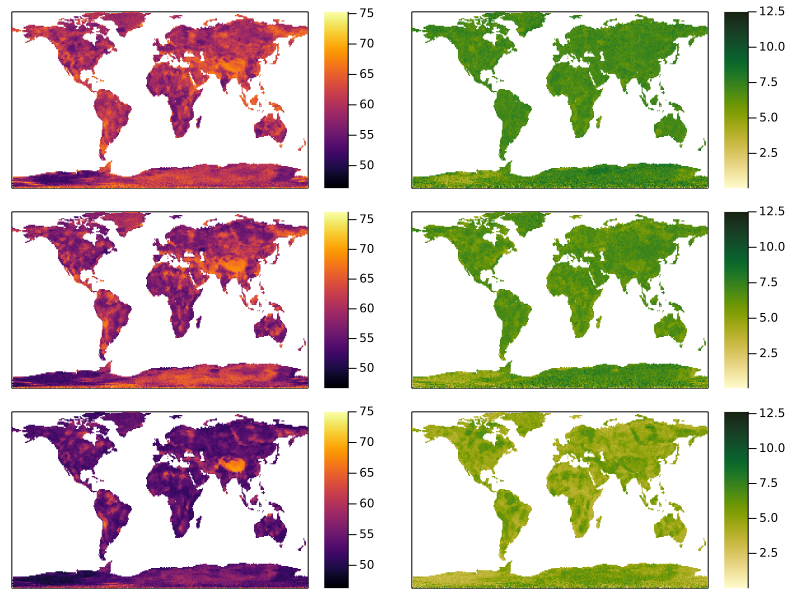

In [104]:
h1 = heatmap(g_upper, framestyle=:box, colorbar=:left, xticks=false, yticks=false)
h2 = heatmap(g_mid,framestyle=:box, xticks=false, yticks=false)
h3 = heatmap(g_low, framestyle=:box, xticks=false, yticks=false)

v1 = heatmap(v_upper, framestyle=:box, color=:speed, xticks=false, yticks=false)
v2 = heatmap(v_mid,framestyle=:box, color=:speed, xticks=false, yticks=false)
v3 = heatmap(v_low, framestyle=:box, color=:speed, xticks=false, yticks=false)

plot(h1,v1, h2,v2, h3,v3, layout=(3,2), size=(800,600), dpi=300)
#savefig("../../thesis/figures/spatial_result.png")

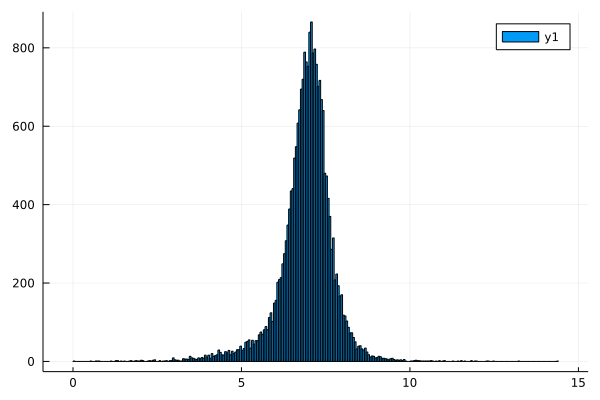

In [95]:
histogram([Iterators.flatten(v_upper)...])

In [18]:
surface, head = readdlm("../data/base/bsr_ignmajors_1.csv", ',', header=true)
head = head[:];

In [39]:
head
lat_i = findfirst(isequal("Latitude"),head)
long_i = findfirst(isequal("Longitude"),head)
si_i = findfirst(isequal("SiO2"),head)
ave_surface_lat, ave_surface_long, ave_surface_si = 
    areaAverage(surface[:,lat_i], surface[:,long_i], surface[:,si_i]);

In [40]:
# map upper crust to surface averages 
d = Dict{Tuple{Float64,Float64},Tuple{Float64,Float64}}()
for i in 1:length(ave_surface_lat)
    d[(ave_surface_lat[i],ave_surface_long[i])] = (ave_surface_si[i], NaN)
end
# add estimated upper crust vals 
for i in 1:length(ave_lat)
    if (ave_lat[i],ave_long[i]) in keys(d)
        d[(ave_lat[i],ave_long[i])] = (d[(ave_lat[i],ave_long[i])][1], ave_si[i])
    end
end
# remove nans 
for k in keys(d)
    if isnan(sum(d[k]))
        pop!(d,k)
    end
end

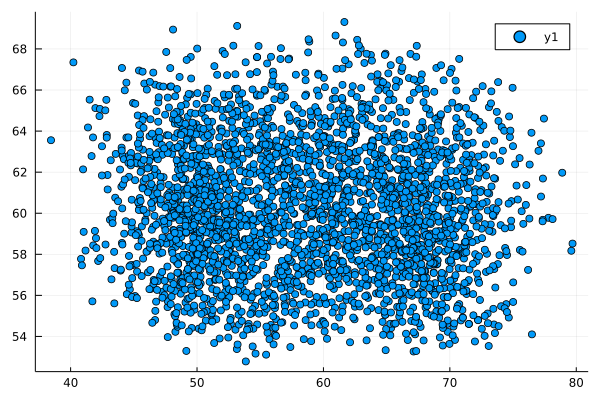

In [45]:
vals = values(d)
scatter([e[1] for e in vals], [e[2] for e in vals])

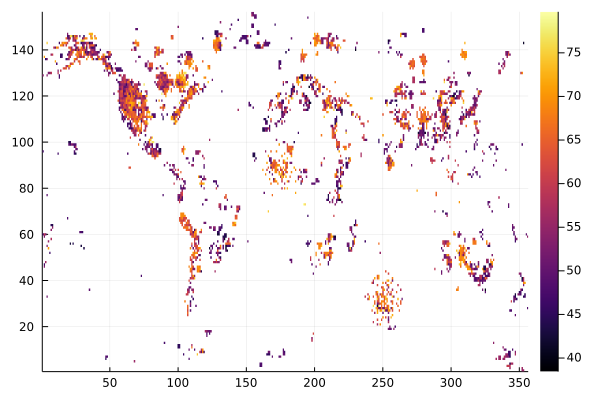

In [48]:
g = globe(areaAverage(surface[:,lat_i], surface[:,long_i], surface[:,si_i])...);
heatmap(g)